In [1]:
import numpy as np

In [4]:
import os
os.chdir('..')

In [6]:
from Anomaly.kernels import gaussian
from Anomaly.utils import normal

In [144]:
kernel = gaussian(1)
law_p = normal(0,1)

In [145]:
X = law_p(1000)

In [146]:
G = np.array([[kernel(X[i].reshape(-1,1),X[j].reshape(-1,1))[0] for i in range(X.shape[0])] for j in range(X.shape[0])])

In [147]:
G

array([[1.        , 0.00349197, 0.08714293, ..., 0.67679566, 0.97914109,
        0.00578551],
       [0.00349197, 1.        , 0.51350629, ..., 0.04616865, 0.00682127,
        0.98827177],
       [0.08714293, 0.51350629, 1.        , ..., 0.41538706, 0.13429929,
        0.60595858],
       ...,
       [0.67679566, 0.04616865, 0.41538706, ..., 1.        , 0.79450494,
        0.06678406],
       [0.97914109, 0.00682127, 0.13429929, ..., 0.79450494, 1.        ,
        0.01095065],
       [0.00578551, 0.98827177, 0.60595858, ..., 0.06678406, 0.01095065,
        1.        ]])

# Best low rank approximation

In [25]:
def best_rank_k(M, k):
    m,n = M.shape
    U,S,Vh = np.linalg.svd(M)
    nbSrow, nbScol, nbSval = min(m,k), min(n,k),min(n,m,k)
    Uk = U[:,:nbSrow]
    Sk = S[:nbSval]
    Vhk = Vh[:nbScol,:]
    Smatk = np.zeros((nbSrow,nbScol))
    Smatk[:nbSval,:nbSval] = np.diag(Sk)
    Mk = Uk.dot(Smatk).dot(Vhk)
    return Mk
    

In [26]:
M= np.random.random((5,10))
M

array([[0.13861963, 0.78407925, 0.04279738, 0.33056442, 0.79801347,
        0.96494453, 0.41305469, 0.30795214, 0.41686605, 0.11659468],
       [0.03881114, 0.86722436, 0.2367365 , 0.07809184, 0.03839693,
        0.00928109, 0.11997161, 0.52780675, 0.50208778, 0.9655016 ],
       [0.70441113, 0.0276773 , 0.29196633, 0.69457386, 0.50548648,
        0.2364194 , 0.5984329 , 0.84343148, 0.25958629, 0.01294761],
       [0.34776697, 0.36208635, 0.18967494, 0.65487287, 0.29896022,
        0.40526721, 0.1181984 , 0.95588195, 0.2528999 , 0.55487908],
       [0.94801406, 0.65356692, 0.13907471, 0.27157124, 0.43525464,
        0.46385475, 0.77553494, 0.80076673, 0.89159691, 0.30387342]])

In [27]:
best_rank_k(M,3)

array([[ 0.23852544,  0.79947312,  0.01148662,  0.21838304,  0.74138005,
         0.92127119,  0.4782465 ,  0.26224816,  0.52110126,  0.08715034],
       [ 0.05057498,  0.84764829,  0.18869295,  0.08828159,  0.00632906,
         0.07317226,  0.05317663,  0.56169231,  0.4994941 ,  0.97117173],
       [ 0.79461077,  0.0151666 ,  0.20892944,  0.62218247,  0.42299415,
         0.28222624,  0.56534004,  0.8506517 ,  0.33533778, -0.00235427],
       [ 0.51203486,  0.42875189,  0.22395566,  0.42517967,  0.25495103,
         0.19998326,  0.36937708,  0.80481201,  0.45303189,  0.48879935],
       [ 0.6848936 ,  0.6143262 ,  0.22423728,  0.56559745,  0.58595523,
         0.57467465,  0.60837314,  0.91874654,  0.61797911,  0.38086439]])

In [28]:
np.linalg.matrix_rank(best_rank_k(M,3))

3

In [29]:
M= np.random.random((1000,1000))
best_rank_k(M,30)

array([[0.47042819, 0.4041469 , 0.53458663, ..., 0.5096351 , 0.45834327,
        0.45089394],
       [0.39556306, 0.38318332, 0.44408424, ..., 0.70207833, 0.56048941,
        0.61678943],
       [0.44970588, 0.30285181, 0.56104924, ..., 0.42599429, 0.47704259,
        0.53357794],
       ...,
       [0.50835436, 0.34228911, 0.571511  , ..., 0.54928947, 0.607133  ,
        0.61629383],
       [0.41112169, 0.52690089, 0.64524947, ..., 0.45839813, 0.61233863,
        0.4994778 ],
       [0.44699297, 0.57675615, 0.40397811, ..., 0.58221067, 0.47609873,
        0.51403578]])

In [30]:
%time best_rank_k(G,30)

CPU times: user 7.95 s, sys: 439 ms, total: 8.39 s
Wall time: 2.21 s


array([[1.        , 0.99558128, 0.50559035, ..., 0.9999574 , 0.16684287,
        0.81663471],
       [0.99558128, 1.        , 0.45096174, ..., 0.9946744 , 0.13900659,
        0.76575455],
       [0.50559035, 0.45096174, 1.        , ..., 0.51104876, 0.76914708,
        0.86830658],
       ...,
       [0.9999574 , 0.9946744 , 0.51104876, ..., 1.        , 0.16977579,
        0.82141184],
       [0.16684287, 0.13900659, 0.76914708, ..., 0.16977579, 1.        ,
        0.45442455],
       [0.81663471, 0.76575455, 0.86830658, ..., 0.82141184, 0.45442455,
        1.        ]])

# Low rank sampling

In [55]:
def approximation_sampling(G, c, p):
    m,n = G.shape
    assert n==m, "is not a squared matrix"
    I = np.random.choice(range(m),size = c, p=p.ravel())
    C = G[:,I]/np.sqrt(c*p[:,I])
    XX, YY = np.meshgrid(I,I)
    W = G[XX.flatten(),YY.flatten()].reshape(((c,c)))/(c*np.sqrt(p[:,I].T.dot(p[:,I])))
    return C.dot(np.linalg.pinv(W)).dot(C.T)

In [56]:
M= np.random.random((5,5))
print(M)
approximation_sampling(M,200, np.ones((1,5))/5)

[[0.07795042 0.78877745 0.6110981  0.70126533 0.43333886]
 [0.44878971 0.25215889 0.77606344 0.47478137 0.5922899 ]
 [0.63424765 0.58981191 0.14322581 0.80741169 0.53136628]
 [0.59094762 0.98513391 0.7096598  0.5922121  0.33818268]
 [0.51520927 0.36974321 0.61443177 0.59691529 0.09989354]]


array([[0.08114106, 0.79174735, 0.61375257, 0.70602221, 0.43721732],
       [0.45143592, 0.25632989, 0.77987149, 0.48042058, 0.59567345],
       [0.62588034, 0.58258037, 0.1404889 , 0.7991485 , 0.52634712],
       [0.59912492, 0.98694395, 0.7146257 , 0.60183297, 0.34221709],
       [0.51105488, 0.36850308, 0.61215582, 0.59259476, 0.0978848 ]])

In [57]:
print(A)
approximation_sampling(A,200, np.ones((1,5))/5)

[[1.         0.99558128 0.50559035 0.45105201 0.98900896]
 [0.99558128 1.         0.45096174 0.39877459 0.97095778]
 [0.50559035 0.45096174 1.         0.99559613 0.59485325]
 [0.45105201 0.39877459 0.99559613 1.         0.53815087]
 [0.98900896 0.97095778 0.59485325 0.53815087 1.        ]]


array([[1.002192  , 0.9976398 , 0.50944811, 0.45493495, 0.99142942],
       [0.97431189, 0.97866576, 0.44273644, 0.39180712, 0.95021603],
       [0.50423824, 0.44966419, 0.99795884, 0.9935547 , 0.59340682],
       [0.46814916, 0.41574624, 1.00413633, 1.00755886, 0.55512678],
       [0.99296397, 0.97324682, 0.62424742, 0.56848667, 1.00699246]])

In [58]:
def robust_approximation_sampling(G, c, p,k):
    m,n = G.shape
    assert n==m, "is not a squared matrix"
    I = np.random.choice(range(m),size = c, p=p.ravel())
    C = G[:,I]/np.sqrt(c*p[:,I])
    XX, YY = np.meshgrid(I,I)
    W = G[XX.flatten(),YY.flatten()].reshape(((c,c)))/(c*np.sqrt(p[:,I].T.dot(p[:,I])))
    W_k = best_rank_k(W,k)
    return C.dot(np.linalg.pinv(W_k)).dot(C.T)

In [63]:
print(A)
robust_approximation_sampling(A,200, np.ones((1,5))/5,5)

[[1.         0.99558128 0.50559035 0.45105201 0.98900896]
 [0.99558128 1.         0.45096174 0.39877459 0.97095778]
 [0.50559035 0.45096174 1.         0.99559613 0.59485325]
 [0.45105201 0.39877459 0.99559613 1.         0.53815087]
 [0.98900896 0.97095778 0.59485325 0.53815087 1.        ]]


array([[0.99484135, 0.99097692, 0.49506803, 0.44053538, 0.98293664],
       [0.99208293, 0.99652421, 0.44923477, 0.39724382, 0.96749019],
       [0.50264399, 0.44806095, 0.99743744, 0.99312298, 0.59186303],
       [0.44620729, 0.39394325, 0.99245634, 0.99705269, 0.53335121],
       [0.95946399, 0.94184348, 0.57644539, 0.52128099, 0.97026227]])

In [66]:
def optimized_approximation_sampling(G, c):
    p = np.sum(G**2, axis = 1)/np.sum(G**2)
    return approximation_sampling(G,c,p.reshape(1,-1))

In [69]:
M= np.random.random((5,5))
print(M)
optimized_approximation_sampling(M,10)

[[0.26966489 0.38140055 0.60493022 0.07731505 0.63939024]
 [0.38384157 0.20615403 0.90602568 0.00325005 0.04640541]
 [0.41408331 0.3775207  0.37422043 0.73555575 0.53865711]
 [0.77975343 0.18629114 0.08169207 0.2877228  0.27246064]
 [0.85104415 0.11167664 0.86973347 0.34366479 0.38326696]]


array([[ 2.69664887e-01,  3.81400551e-01, -5.79520625e+00,
         7.73150486e-02,  6.39390239e-01],
       [ 3.83841566e-01,  2.06154033e-01, -1.16857381e+00,
         3.25005399e-03,  4.64054096e-02],
       [ 4.14083306e-01,  3.77520703e-01,  2.36283382e+00,
         7.35555752e-01,  5.38657107e-01],
       [ 7.79753427e-01,  1.86291141e-01,  8.12938265e-01,
         2.87722798e-01,  2.72460639e-01],
       [ 8.51044147e-01,  1.11676641e-01,  1.13302931e+00,
         3.43664794e-01,  3.83266958e-01]])

In [70]:
def robust_optimised_approximation_sampling(G,c,k):
    p = np.sum(G**2, axis = 1)/np.sum(G**2)
    return robust_approximation_sampling(G,c,p.reshape(1,-1),k)

In [79]:
M= np.random.random((5,5))
print(M)
robust_optimised_approximation_sampling(M,10,5)

[[0.21620566 0.38462539 0.99361266 0.26396077 0.20107308]
 [0.44848261 0.19525719 0.95536706 0.1920398  0.04195527]
 [0.33112271 0.03887906 0.00626915 0.23523533 0.14491438]
 [0.88097678 0.11755752 0.71229546 0.46520052 0.13166533]
 [0.3638866  0.19711628 0.0588875  0.93330391 0.62279766]]


array([[ 0.21620566,  0.38462539, -0.601285  ,  0.26396077,  0.20107308],
       [ 0.44848261,  0.19525719,  0.3533865 ,  0.1920398 ,  0.04195527],
       [ 0.33112271,  0.03887906,  0.77182179,  0.23523533,  0.14491438],
       [ 0.88097678,  0.11755752,  1.79468293,  0.46520052,  0.13166533],
       [ 0.3638866 ,  0.19711628,  1.44091761,  0.93330391,  0.62279766]])

# Comparaison of several approximation sampling

In [98]:
import matplotlib.pyplot as plt

In [129]:
def reconstruction_error(Mat, Meth):
    newM = Meth(M)
    return np.linalg.norm(newM-Mat)

In [100]:
M= np.random.random((5,5))
Meth = lambda x : approximation_sampling(x, 10, np.ones((1,x.shape[0]))/x.shape[0])
reconstruction_error(M,Meth)

1.389221923509296

In [118]:
L = []
for n in range(100):
    errors = []
    for i in range(100):
        M= np.random.random((5,5))
        Meth = lambda x : approximation_sampling(x, n, np.ones((1,x.shape[0]))/x.shape[0])
        errors.append(reconstruction_error(M,Meth))
    err = np.mean(errors)
    L.append(err)

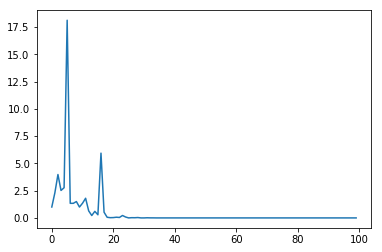

In [119]:
plt.plot(L)

In [116]:
L = []
for n in range(100):
    errors = []
    for i in range(100):
        M= np.random.random((50,50))
        Meth = lambda x : optimized_approximation_sampling(x, n)
        errors.append(reconstruction_error(M,Meth))
    err = np.mean(errors)
    L.append(err)

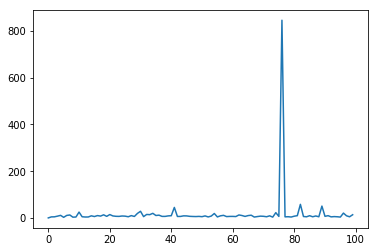

In [117]:
plt.plot(L)

In [114]:
L = []
for n in range(100):
    errors = []
    for i in range(100):
        M= np.random.random((50,50))
        Meth = lambda x : robust_optimised_approximation_sampling(x, n,5)
        errors.append(reconstruction_error(M,Meth))
    err = np.mean(errors)
    L.append(err)

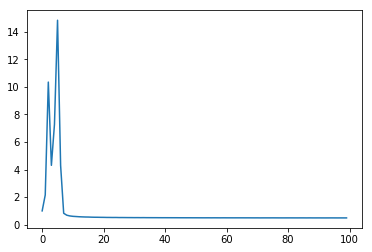

In [115]:
plt.plot(L)

In [139]:
M = G[500:,500:]
errors_ = []
errors_opt = []
errors_opt_rob = []
for n in range(100):
    Meth = lambda x : approximation_sampling(x, n, np.ones((1,x.shape[0]))/x.shape[0])
    errors_.append(reconstruction_error(M,Meth))
    
    Meth = lambda x : optimized_approximation_sampling(x, n)
    errors_opt.append(reconstruction_error(M,Meth))
    
    Meth = lambda x : robust_optimised_approximation_sampling(x, n,20)
    errors_opt_rob.append(reconstruction_error(M,Meth))


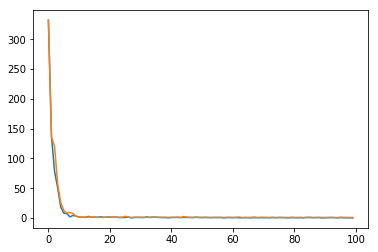

In [143]:
plt.plot(errors_)
plt.plot(errors_opt)
plt.plot(errors_opt_rob)